## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [5]:
import os
import keras
import itertools
from keras.layers import Dropout
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:

def build_mlp(input_shape, output_units=10, n_neurons=[512, 256, 128], drop_r=0.2):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(n_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
            x = Dropout(drop_r)(x)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
            x = Dropout(drop_r)(x)
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-2
BATCH_SIZE = 256
EPOCHS = 50
DROPOUT_EXP = [0.1, 0.2, 0.25, 0.3]

In [11]:
results = {}
for i, drp_r in enumerate(DROPOUT_EXP):
    print('Experiment with dropout rate-%s' % str(drp_r))
    model = build_mlp(input_shape=x_train.shape[1:],drop_r=drp_r)
    optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test), shuffle=True)

    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']

    exp_name_tag = 'dropout rate=-%s' % str(drp_r)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'val-loss': valid_loss,
                             'train-acc': train_acc,
                             'val-acc': valid_acc}
     

=======================] - 10s 202us/step - loss: 2.3035 - accuracy: 0.0984 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 19/50
50000/50000 [==============================] - 9s 189us/step - loss: 2.3031 - accuracy: 0.0988 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 20/50
50000/50000 [==============================] - 9s 188us/step - loss: 2.3030 - accuracy: 0.1009 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 21/50
50000/50000 [==============================] - 9s 189us/step - loss: 2.3031 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 22/50
50000/50000 [==============================] - 9s 189us/step - loss: 2.3031 - accuracy: 0.1010 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 23/50
50000/50000 [==============================] - 10s 192us/step - loss: 2.3029 - accuracy: 0.1008 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 24/50
50000/50000 [==============================] - 9s 189us/step - loss: 2.3040 - accuracy: 0.0996 - val_loss: 2.3034 - val_accu

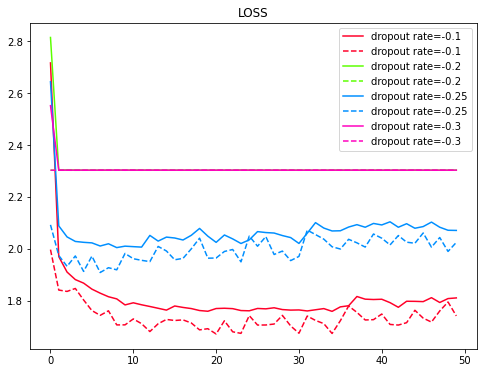

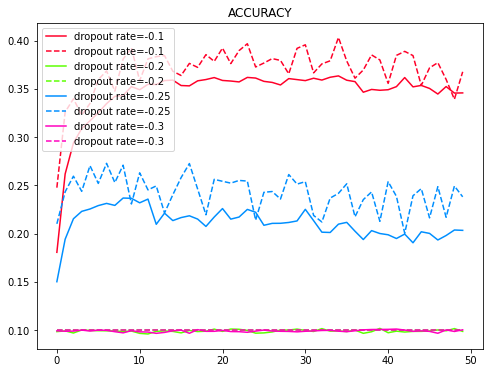

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
import matplotlib.cm as mplcm
num_colors = 4
cNorm = colors.Normalize(vmin=0, vmax=num_colors-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=plt.get_cmap('gist_rainbow'))
color_bar = [scalarMap.to_rgba(i) for i in range(num_colors)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label = cond, color = color_bar[i])
    plt.plot(range(len(results[cond]['val-loss'])),results[cond]['val-loss'], '--', label = cond, color = color_bar[i])
plt.title('LOSS')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label = cond, color = color_bar[i])
    plt.plot(range(len(results[cond]['val-acc'])),results[cond]['val-acc'], '--', label = cond, color = color_bar[i])
plt.title('ACCURACY')
plt.legend()
plt.show()
